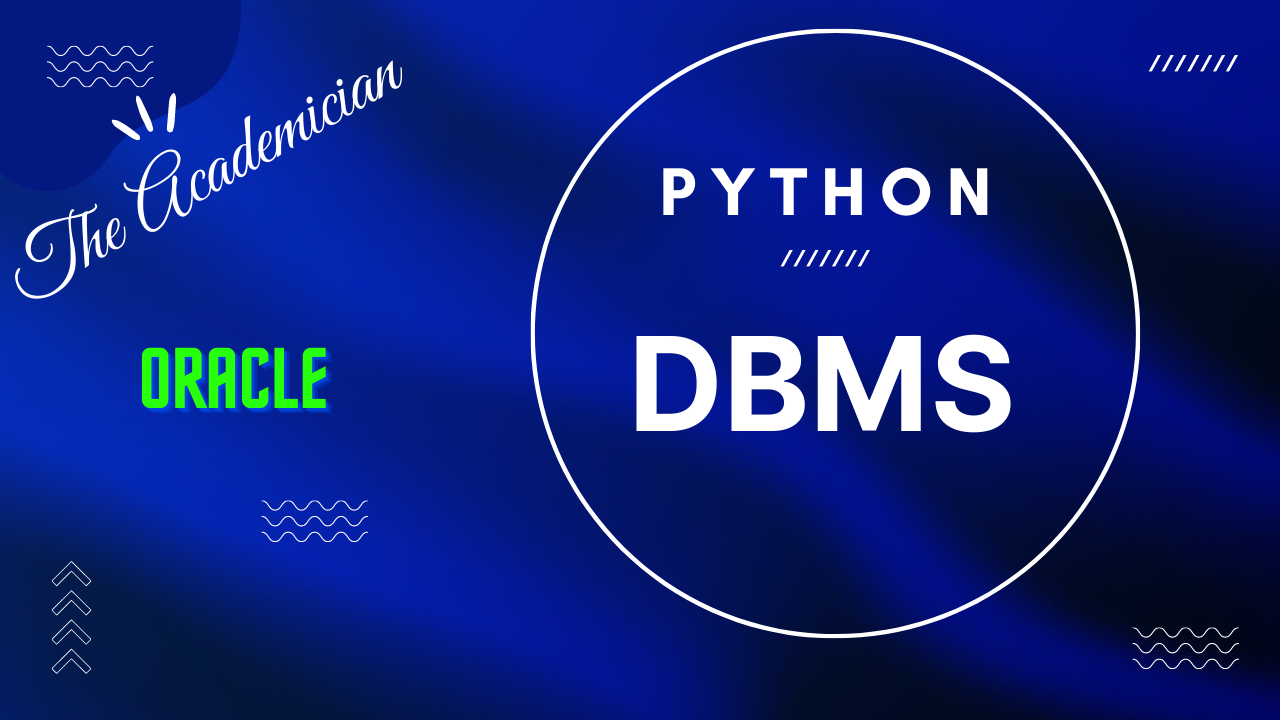

# Handling database using Python

## Step 1: Install Database Express Edition from https://www.oracle.com/in/downloads/ 
# https://www.oracle.com/in/database/technologies/xe-downloads.html

## Step 2: Oracle Instant Client Downloads for Microsoft Windows (x64) 64-bit
## https://www.oracle.com/in/database/technologies/instant-client/winx64-64-downloads.html

### unzip the file and store it into a file. C:\oracle\instantclient_21_6

## Step 3: Set the path: 
#### Edit the system envionment variable --> click on environment variables --> click on path --> store "C:\oracle\instantclient_21_6" and click OK

## Step 4: Install cx_Oracle using "pip install cx_Oracle"


In [ ]:
!pip install cx_Oracle

* **cx_Oracle module**: A connector for communicating with any database through Python 
* **connect()**: To establish a connection between the Python and Oracle database 
* **cursor()**: Object for SQL query to provide results 
* **cursor.execute(sqlquery)**: To execute a single query 
* **cursor.executemany(sqlqueries)**: To execute a single query with multiple bind variables/place holders
* **commit()**: To make changes reflect in the database
* **close()**: It is mandatory to close all the operations


In [3]:
# Example 1 
import cx_Oracle
cx_Oracle.init_oracle_client(lib_dir=r"C:\oracle\instantclient_21_6")

con = cx_Oracle.connect('SYSTEM/tiger@localhost')
print("version: ",con.version)
con.close()

version:  21.3.0.0.0


In [10]:
# Example 2, Create a table students where attributes are roll, name, age and add 
import cx_Oracle

con = cx_Oracle.connect('SYSTEM/tiger@localhost')
cursor = con.cursor() # Object for SQL query to provide results 

cursor.execute('create table student(roll number, name varchar2(10),'
               'age number, addr varchar2(10))')

print("Table created successfully")
    
cursor.close(); con.commit(); con.close()

Table created successfully


In [6]:
# Example 3, Create a table students where attributes are roll, name, age and add 
import cx_Oracle

try:
    con = cx_Oracle.connect('SYSTEM/tiger@localhost')
    cursor = con.cursor()
    
    cursor.execute("create table student1(roll number, name varchar2(10), age number, addr varchar2(10))")
    print("Table created successfully")
    
    cursor.close(); con.commit(); con.close()

    
except cx_Oracle.DatabaseError as e:
    if con:
        con.rollback()
        print("Problem is there with sql",e)

Table created successfully


In [11]:
# Example 4, Inserting a data into the student table
import cx_Oracle
try:
    con = cx_Oracle.connect('SYSTEM/tiger@localhost')
    cursor = con.cursor()
    
    cursor.execute("insert into student values(1,'Niraj', 24, 'Haryana')")
    print("Row inserted successfully!")
    
    cursor.close(); con.commit(); con.close()

except cx_Oracle.DatabaseError as e:
    if con:
        con.rollback()
        print("Problem is there with sql",e) 

Row inserted successfully!


In [12]:
# Example 5, Insert more than one data into the student table
import cx_Oracle
try:
    con = cx_Oracle.connect('SYSTEM/tiger@localhost')
    cursor = con.cursor()
    sql = "insert into student values(:roll,:name,:age,:addr)"
    
    records=[(2,'Rafi', 20,'Noida'),
            (3,'Raju', 31,'Kerala'),
            (4,'Sandhya', 24,'Oddisa')]
    
    cursor.executemany(sql, records)
    print("All the rows are inserted successfully")
    
    cursor.close()
    con.commit()
    con.close()
    
except cx_Oracle.DatabaseError as e:
    if con:
        con.rollback()
        print("Problem is there with sql",e)

All the rows are inserted successfully


In [13]:
# Example 6, Enter the data using key board
import cx_Oracle
try:
    con = cx_Oracle.connect('SYSTEM/tiger@localhost')
    cursor = con.cursor()
    
    while True:
        roll = int(input("Enter roll:"))
        name = input("Enter name:")
        age = int(input("Enter age:"))
        addr = input("Enter Address:")
        
        sql = "insert into student values(%d,'%s',%d,'%s')"
        cursor.execute(sql %(roll, name, age, addr))
        
        print("Row is added successfully...\n")
        option=input("Insert one more record? [yes|no] :")
        
        if option == "no":
            cursor.close(); con.commit(); con.close()
            break
            
except cx_Oracle.DatabaseError as e:
    if con:
        con.rollback()
        print("Problem is there with sql",e)

Enter roll:5
Enter name:Manish
Enter age:38
Enter Address:Pune
Row is added successfully...

Insert one more record? [yes|no] :yes
Enter roll:6
Enter name:Neha
Enter age:20
Enter Address:Patna
Row is added successfully...

Insert one more record? [yes|no] :no


In [14]:
# Example 7, Display all the content of the student database
import cx_Oracle

try:
    con = cx_Oracle.connect('SYSTEM/tiger@localhost')
    cursor = con.cursor()
    
    cursor.execute("select * from student")
    row = cursor.fetchone()
    
    while row is not None:
        print(row)
        row = cursor.fetchone()
        
    cursor.close(); con.commit(); con.close()
        
except cx_Oracle.DatabaseError as e:
    if con:
        con.rollback()
        print("Problem is there with sql",e)

(1, 'Niraj', 24, 'Haryana')
(2, 'Rafi', 20, 'Noida')
(3, 'Raju', 31, 'Kerala')
(4, 'Sandhya', 24, 'Oddisa')
(5, 'Manish', 38, 'Pune')
(6, 'Neha', 20, 'Patna')


In [15]:
# Example 8, Display age in order
import cx_Oracle
con = cx_Oracle.connect('SYSTEM/tiger@localhost')
cur = con.cursor()

cur.execute('select * from student order by age')

for data in cur:
    print(data)
    
cur.close()
con.commit()
con.close()  

(2, 'Rafi', 20, 'Noida')
(6, 'Neha', 20, 'Patna')
(1, 'Niraj', 24, 'Haryana')
(4, 'Sandhya', 24, 'Oddisa')
(3, 'Raju', 31, 'Kerala')
(5, 'Manish', 38, 'Pune')


In [19]:
# Example 9, Display data of any particular roll number 
import cx_Oracle

con = cx_Oracle.connect('SYSTEM/tiger@localhost')
cur = con.cursor()

roll = int(input("Enter roll: "))

sql = "select * from student where roll = %d"
cur.execute(sql %(roll))
fetchedData = cur.fetchall()

if len(fetchedData) == 0:
    print("Roll number is not available")
else: 
    print (fetchedData)

cur.close(); con.commit(); con.close()  

Enter roll: 10
Roll number is not available


In [21]:
# Example 10, Display recordwise
import cx_Oracle
try:
    con = cx_Oracle.connect('SYSTEM/tiger@localhost')
    cursor = con.cursor()
    
    cursor.execute("select * from student")
    data=cursor.fetchall()
    #data=cursor.fetchmany(3)
  
    for row in data:
        print("\nStudent Roll:",row[0])
        print("Student Name:",row[1])
        print("Student age:",row[2])
        print("Student Address:",row[3])
        
    cursor.close(); con.commit(); con.close()


except cx_Oracle.DatabaseError as e:
    if con:
        con.rollback()
        print("Problem is there with sql",e)


Student Roll: 1
Student Name: Niraj
Student age: 24
Student Address: Haryana

Student Roll: 2
Student Name: Rafi
Student age: 20
Student Address: Noida

Student Roll: 3
Student Name: Raju
Student age: 31
Student Address: Kerala


In [22]:
# Example 11, Update a table
import cx_Oracle

con=cx_Oracle.connect('SYSTEM/tiger@localhost')

def updateRoll(roll, newAge):
    cur = con.cursor()
    cur.execute("update student set age = :newAge where roll = :roll",
                {'roll': (roll), 'newAge': (newAge)})
    
    if cur.rowcount > 0:
        print('Age updated successfully.')
        
    else:
        print('Update failed.')
        
    cur.close(); con.commit(); con.close()

try:
    roll = int(input("Enter roll: "))
    age = int(input("Enter updated age: "))
    updateRoll(roll, age)
    
except cx_Oracle.DatabaseError as e:
    if con:
        con.rollback()
        print("Problem is there with sql",e)

Enter roll: 3
Enter updated age: 35
Age updated successfully.


In [23]:
# Example 12, Delete 
import cx_Oracle

try:
    con=cx_Oracle.connect('SYSTEM/tiger@localhost')
    cur = con.cursor()
    
    roll = int(input("Enter roll:"))
    
    sql = "delete from student where roll = %d"
    
    cur.execute(sql %(roll))
    print("Row deleted successfully")
    
    cur.close(); con.commit(); con.close()
    
except cx_Oracle.DatabaseError as e:
    if con:
        con.rollback()
        print("Problem is there with sql",e)

Enter roll:4
Row deleted successfully


In [24]:
# # Example 13, Conditional delete 
import cx_Oracle

try:
    con=cx_Oracle.connect('SYSTEM/tiger@localhost')
    cur = con.cursor()
    
    maxAge = int(input("Enter max age limit:"))
    
    sql="delete from student where age>%d"
    
    cur.execute(sql %(maxAge))
    print("Rows deleted successfully")
    
    cur.close(); con.commit(); con.close()
    
except cx_Oracle.DatabaseError as e:
    if con:
        con.rollback()
        print("Problem is there with sql",e)

Enter max age limit:30
Rows deleted successfully


In [25]:
# Example 14, Delete the student table

import cx_Oracle
try:
    con=cx_Oracle.connect('SYSTEM/tiger@localhost')
    cursor=con.cursor()
    
    cursor.execute("drop table student")
    print("Table deleted successfully")
    
    cursor.close(); con.commit(); con.close()

except cx_Oracle.DatabaseError as e:
    if con:
        con.rollback()
        print("Problem is there with sql",e)

Table deleted successfully


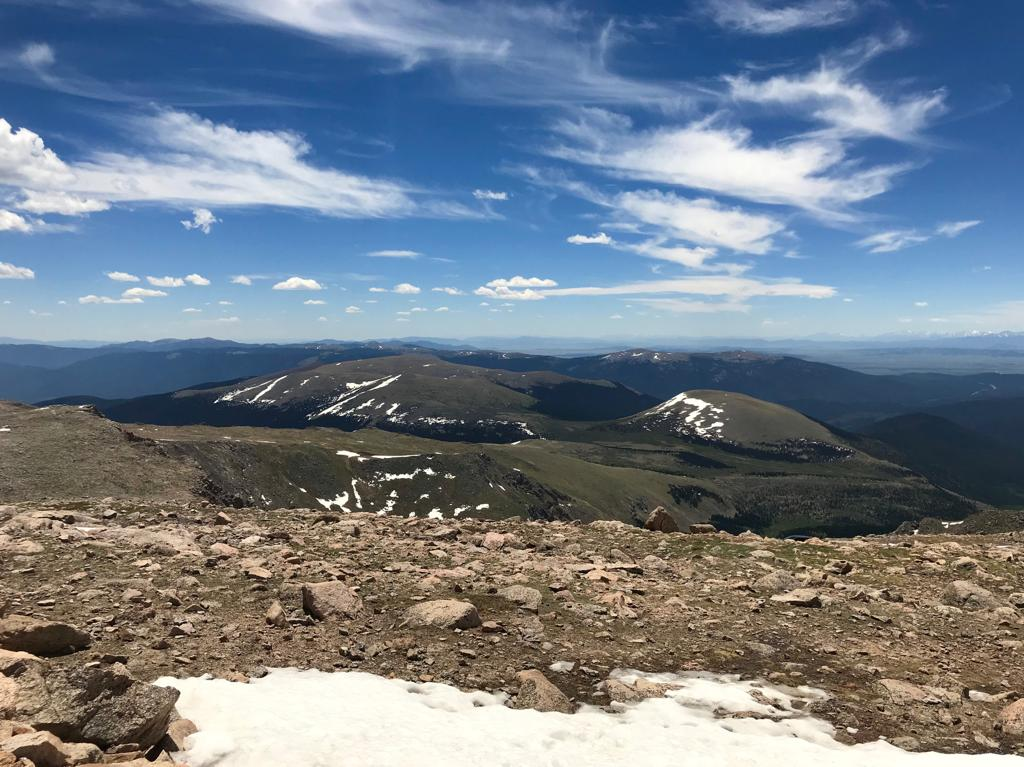

In [ ]:
# ================================== Thank You ================================================